In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [22]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [31]:
df['Cabin']=df['Cabin'].fillna('Unknown')

In [32]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [33]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
le=LabelEncoder()
columns=['Sex','Ticket','Cabin','Embarked']
for i in columns:
  df[i]=le.fit_transform(df[i])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [44]:
df.drop(['Name'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,0,28.0,1,2,675,23.4500,147,2
889,890,1,1,1,26.0,0,0,8,30.0000,60,0


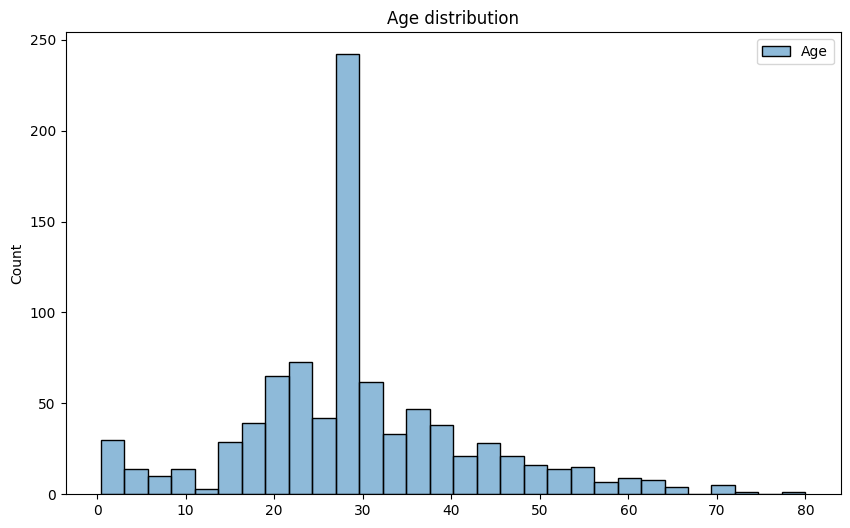

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df[['Age']])
plt.title('Age distribution')
plt.show()

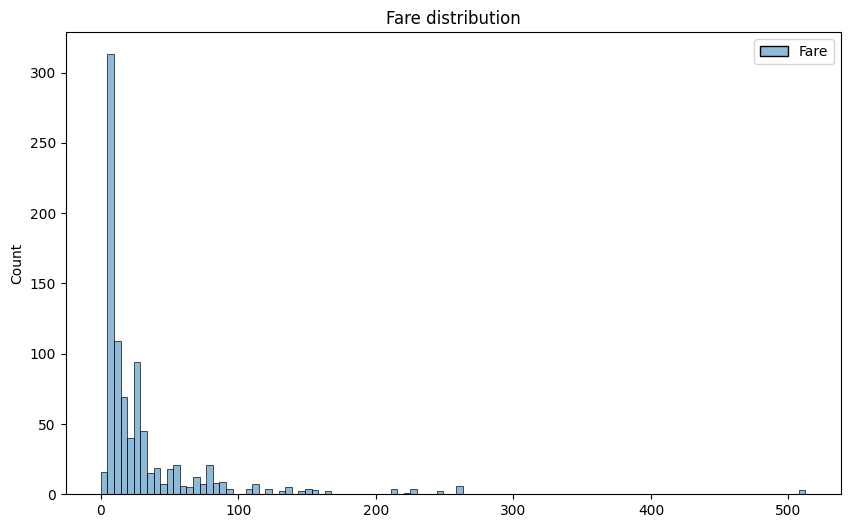

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(df[['Fare']])
plt.title('Fare distribution')
plt.show()

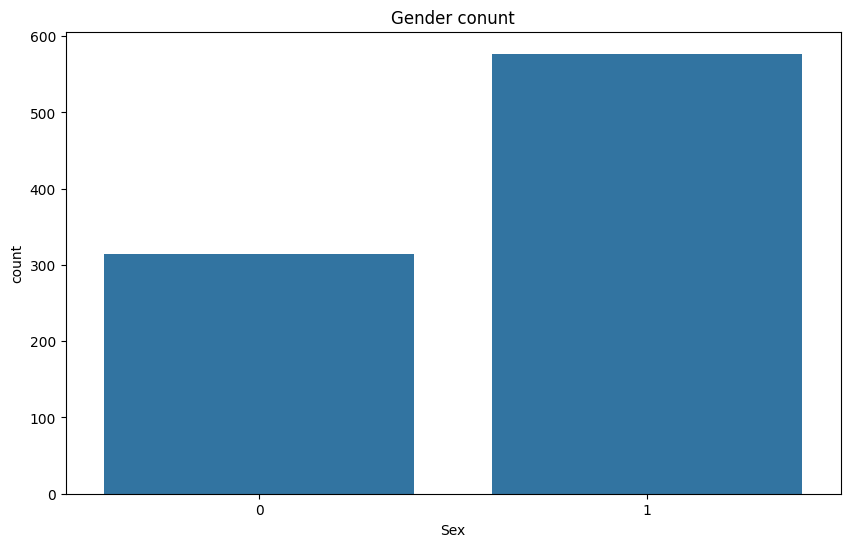

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',data=df)
plt.title('Gender conunt')
plt.show()

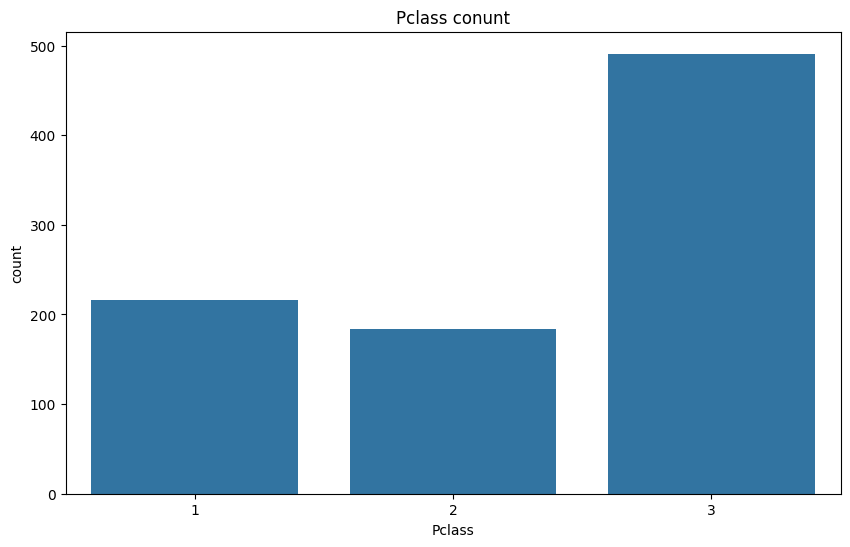

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',data=df)
plt.title('Pclass conunt')
plt.show()

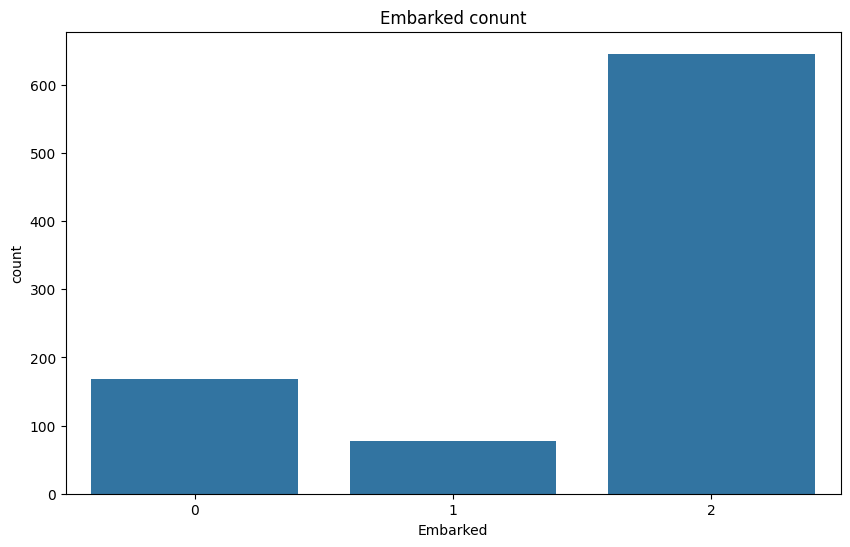

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked',data=df)
plt.title('Embarked conunt')
plt.show()

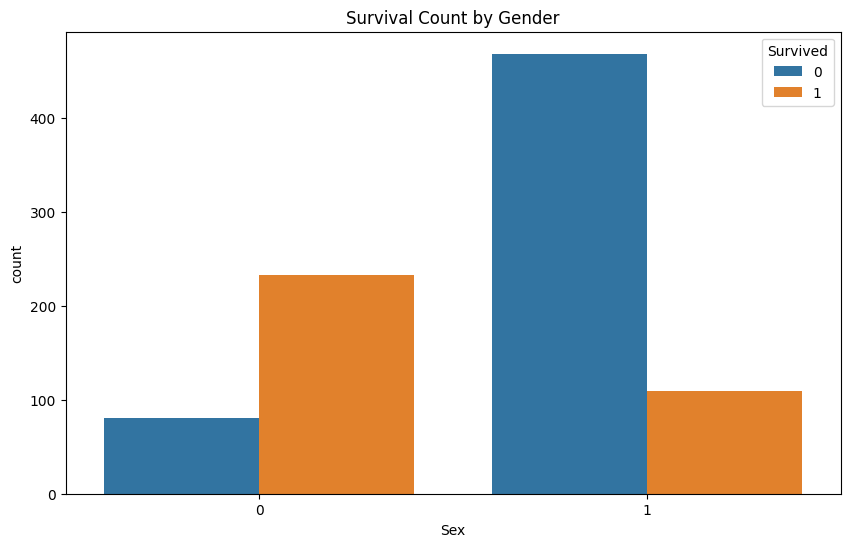

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()


In [57]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [58]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


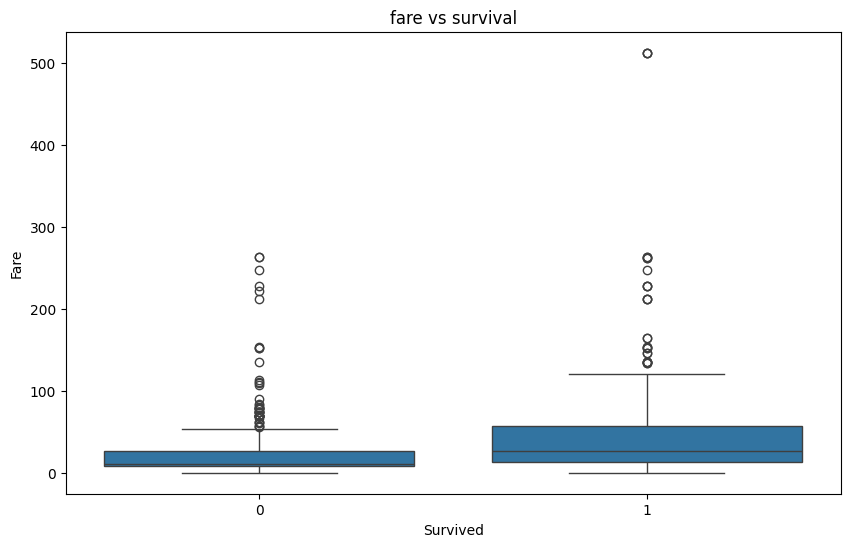

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title('fare vs survival')
plt.show()


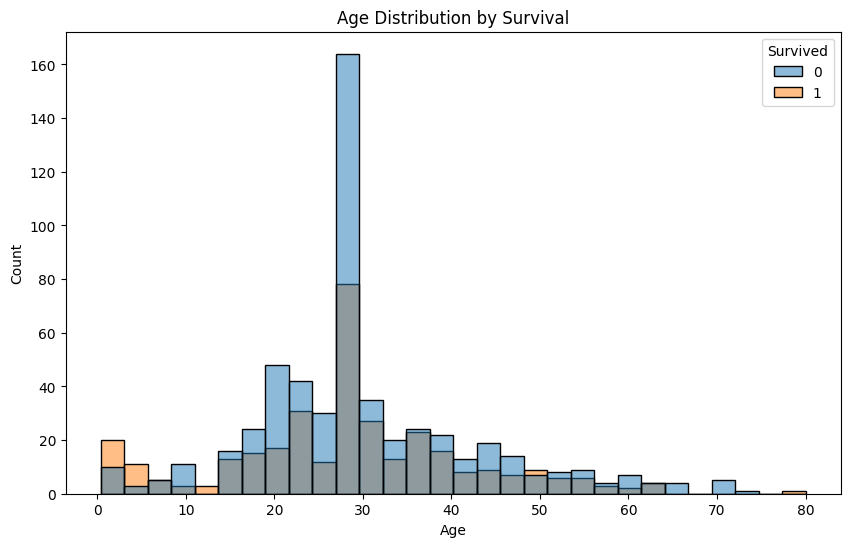

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='Survived',kde=False,bins=30)
plt.title('Age Distribution by Survival')
plt.show()


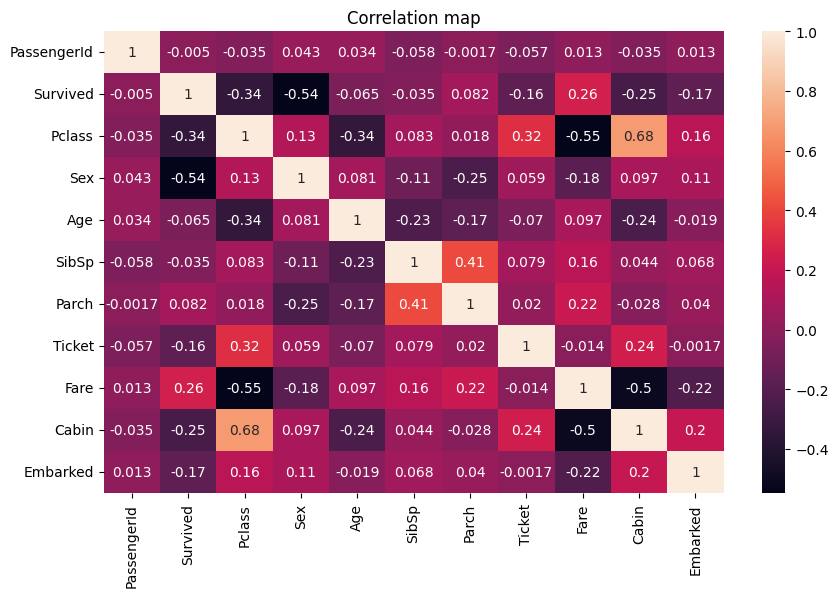

In [69]:
plt.figure(figsize=(10,6))
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title('Correlation map')
plt.show()


In [70]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2


In [72]:
df['Familysize']=df['SibSp']+df['Parch']+1
df['Familysize']

,Familysize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [73]:
df['isalone']=df['Familysize'].apply(lambda x:1 if x==1 else 0)

In [74]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [75]:
bins = [0, 12, 18, 35, 55, 100]
labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)


In [76]:
sc=StandardScaler()
df[['Age_scaled','Fare_scales','Familysize_scaled']]=sc.fit_transform(df[['Age','Fare','Familysize']])

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,isalone,Title,AgeGroup,Age_scaled,Fare_scales,Familysize_scaled
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2,2,0,Mr,YoungAdult,-0.565736,-0.502445,0.059160
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0,2,0,Mrs,Adult,0.663861,0.786845,0.059160
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2,1,1,Miss,YoungAdult,-0.258337,-0.488854,-0.560975
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2,2,0,Mrs,YoungAdult,0.433312,0.420730,0.059160
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2,1,1,Mr,YoungAdult,0.433312,-0.486337,-0.560975
